SAMGeo example showing text prompt segmentation
https://samgeo.gishub.org/examples/sam2_text_prompts/

Grounding DINO is a vision-language model trained to detect objects in images using natural language descriptions. When you give it a prompt like "a red car" or "solar panel", it outputs one or more bounding boxes in the image where it believes those objects are located. It’s doing object detection based on text grounding — linking words to visual regions.

Input: An image + a text prompt

Output: One or more bounding boxes with confidence scores

Segment Anything Model (SAM) takes bounding boxes (or points, masks, etc.) and returns pixel-accurate segmentation masks. These masks tightly outline the actual shape of the object inside each box.

Input: An image + bounding boxes (from Grounding DINO)

Output: Precise segmentation masks per box

In [1]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [2]:
m = leafmap.Map(center=[-22.17615, -51.253043], zoom=18, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [3]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

In [4]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/45
Downloaded image 02/45
Downloaded image 03/45
Downloaded image 04/45
Downloaded image 05/45
Downloaded image 06/45
Downloaded image 07/45
Downloaded image 08/45
Downloaded image 09/45
Downloaded image 10/45
Downloaded image 11/45
Downloaded image 12/45
Downloaded image 13/45
Downloaded image 14/45
Downloaded image 15/45
Downloaded image 16/45
Downloaded image 17/45
Downloaded image 18/45
Downloaded image 19/45
Downloaded image 20/45
Downloaded image 21/45
Downloaded image 22/45
Downloaded image 23/45
Downloaded image 24/45
Downloaded image 25/45
Downloaded image 26/45
Downloaded image 27/45
Downloaded image 28/45
Downloaded image 29/45
Downloaded image 30/45
Downloaded image 31/45
Downloaded image 32/45
Downloaded image 33/45
Downloaded image 34/45
Downloaded image 35/45
Downloaded image 36/45
Downloaded image 37/45
Downloaded image 38/45
Downloaded image 39/45
Downloaded image 40/45
Downloaded image 41/45
Downloaded image 42/45
Downloaded image 43/45
Downloaded 

In [5]:
image = '/home/jgillan/Documents/pima_aerial/Image.tif'

In [5]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=37796022.0, center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [6]:
sam = LangSAM(model_type="sam2-hiera-large")

final text_encoder_type: bert-base-uncased


In [8]:
text_prompt = "tree"

In [9]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

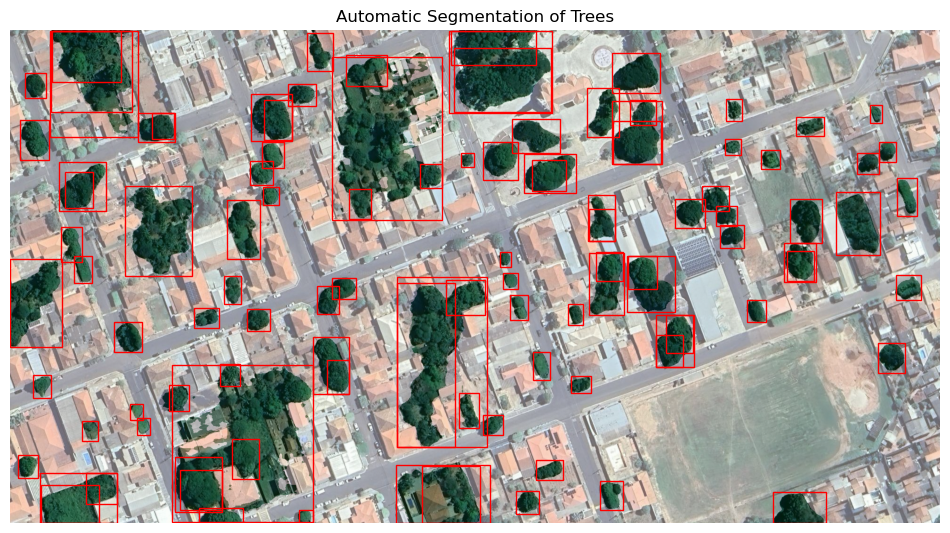

In [10]:
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Trees",
    blend=True,
)

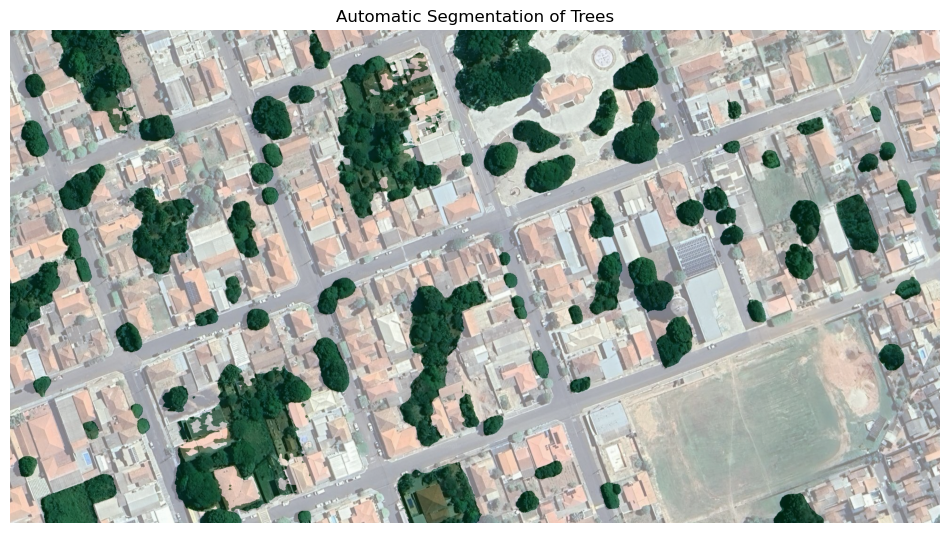

In [11]:
sam.show_anns(
    cmap="Greens",
    add_boxes=False,
    alpha=0.5,
    title="Automatic Segmentation of Trees",
)

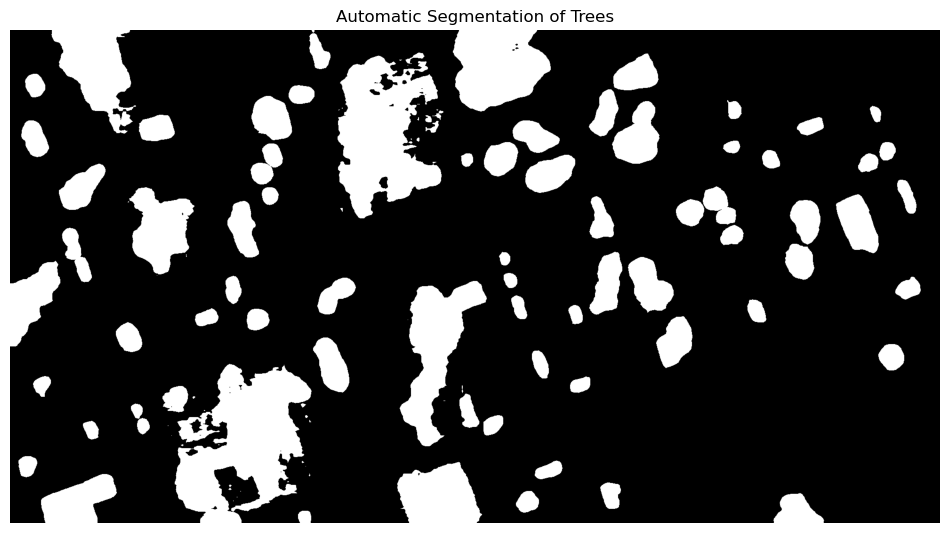

In [12]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Trees",
    blend=False,
    output="trees.tif",
)

In [13]:
da, gdf = sam.region_groups(
    image="trees.tif",
    min_size=100,
    out_csv="objects.csv",
    out_image="objects.tif",
    out_vector="objects.gpkg",
)

In [14]:
m.add_raster("objects.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("objects.gpkg", layer_name="Vector", style=style)
m

ValueError: Please use a valid rio-tiler registered colormap name. Invalid: Greens

In [15]:
sam.show_map()

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…